<a href="https://colab.research.google.com/github/Jmpabone/intregracion-de-datos/blob/main/reto_1_aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # manejo de Data Frame en Python
pd.set_option('display.max_columns', 50) # Aumenta el número de columnas
import numpy as np
# Librería de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
path= "/marketing_campaign.csv" # Colocar la ubicación del archivo
datos= pd.read_csv(path,sep="\t")
datos.shape

(2240, 29)

In [ ]:
datos= datos.dropna() # Elimina registros que contengan al menos un NA

In [ ]:
#Realizar un gráfico apropiado para responder a la pregunta ¿los clientes que tienen hijos, aceptan más campañas de promoción?

#Sumamos kidhome y Teenhome para crear una variable llamada numero de hijos
datos["Children"]= datos["Kidhome"]+datos["Teenhome"]
datos["Children"].value_counts()
#Creamos una nueva variable para saber si tiene o no hijos
datos.loc[datos["Children"]==0, "tiene hijos"] = "no"
datos.loc[datos["Children"]>0, "tiene hijos"] = "si"

In [ ]:
#Para este caso creamos una variable que junte las campañas de promoción en 1 sola
datos["Numcmp"]= datos[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5", "Response"]].sum(axis=1)
datos["Numcmp"].value_counts()

Numcmp
0    1611
1     369
2     139
3      51
4      36
5      10
Name: count, dtype: int64

In [ ]:
#se crea un grafico de barras comparando si los clientes con hijos aceptan mas campañas que los clientes sin hijos
tabla_frecuencia_hijos= datos.groupby("tiene hijos")["Numcmp"].value_counts(normalize=True)
tabla_frecuencia_hijos

tiene hijos  Numcmp
no           0         0.554502
             1         0.219589
             2         0.105845
             3         0.060032
             4         0.047393
             5         0.012638
si           0         0.795957
             1         0.145294
             2         0.045483
             3         0.008212
             4         0.003790
             5         0.001263
Name: proportion, dtype: float64

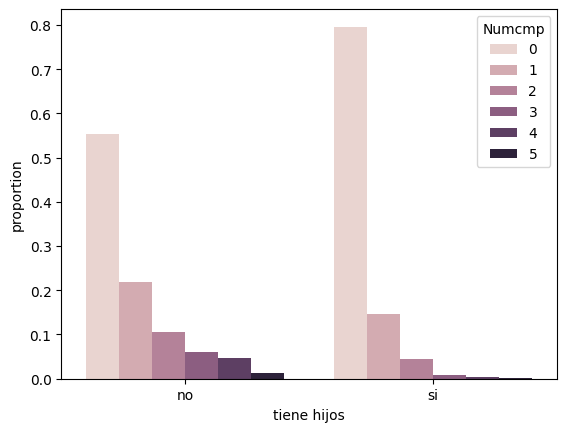

In [ ]:
sns.barplot(data=tabla_frecuencia_hijos.reset_index(), x="tiene hijos", y="proportion", hue="Numcmp")
plt.show()

Los que no tienen hijos tienen una proporción mayor de aceptar campañas según la gráfica. Los clientes con hijos aceptan menos campañas que los que no tienen hijos

In [ ]:
#Realizar los gráficos apropiados para responder a la pregunta
#¿Los clientes que realizan compras con descuento realizan más compras por catálogo, tienda física o página web? Responda la pregunta.

#Variables importantes:
#NumDealsPurchases: Number of purchases made with a discount
#NumWebPurchases: Number of purchases made through the company’s website
#NumCatalogPurchases: Number of purchases made using a catalogue
#NumStorePurchases: Number of purchases made directly in stores

#PLAN GRAFICOS DE DISPERSION

px.scatter(datos, y="NumDealsPurchases", x="NumWebPurchases", title= "gráfica de dispersión entre ventas Deals y Ventas de internet")

In [ ]:
px.scatter(datos, y="NumDealsPurchases", x="NumCatalogPurchases", title= "gráfica de dispersión entre ventas Deals y Ventas de catalogo")

In [ ]:
px.scatter(datos, y="NumDealsPurchases", x="NumStorePurchases", title= "gráfica de dispersión entre ventas Deals y Ventas de tienda")

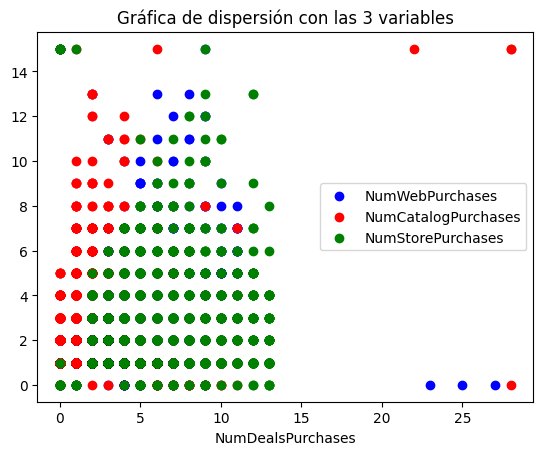

In [ ]:
#datos NumWebPurchases
y1 = datos["NumDealsPurchases"]
x1 = datos["NumWebPurchases"]
plt.scatter(x1, y1, c = "blue", label = "NumWebPurchases")

#datos NumCatalogPurchases
y2 = datos["NumDealsPurchases"]
x2 = datos["NumCatalogPurchases"]
plt.scatter(x2, y2, c = "red", label = "NumCatalogPurchases")

#datos NumStorePurchases
y3 = datos["NumDealsPurchases"]
x3 = datos["NumStorePurchases"]
plt.scatter(x3, y3, c = "green", label = "NumStorePurchases")

plt.title("Gráfica de dispersión con las 3 variables")
plt.xlabel("NumDealsPurchases")
plt.legend()
plt.show()

Al analizar las gráficas los clientes que compran con descuento, suelen comprar mas en tienda.